# Wrangle And Analyze Data Project
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Gathering">Gathering</a></li>
<li><a href="#assessing">Assessing</a></li>
<li><a href="#cleaning">Cleaning</a></li>
<li><a href="#analysis&vis">Analysis And Visualization</a></li>
<li><a href="#ref">References</a></li>       
</ul>

<a id='intro'></a>
## Introduction
Introduction:
In this project I will use three steps to wrangle WeRateDog account data WeRateDog is an account in Twitter.
- Gathering: in this step I will gather the date from multiple resources such as CSV, downloading file from Internet and Twitter API 
- Assessing:in this step I have go through the data and try to find out quality and tidiness issues either visually or programmatically 
- Cleaning: in this step I have cleaned all the issues using Pandas and numpy libraries.  


In [1]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd 
import requests
from bs4 import BeautifulSoup
import os
from PIL import Image
from io import BytesIO
import tweepy
import glob
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Gathering 

### Reading CSV file

In [3]:
# read csv file 
df = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### downloading file from internet.

In [5]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [6]:
with open ('image_predictions.tsv', mode ='wb') as file:
    file.write(response.content)

In [7]:
df2 = pd.read_csv('image_predictions.tsv', '\t')
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Read Twitter's API 

In [8]:
# Note 
import json

df_list = []
with open('tweet-json.txt', 'r', encoding = 'utf8') as file: 
    for line in file:
        tweet = json.loads(line)
        df_list.append({'tweet_id' : tweet['id'],
                        'favorites' : tweet['favorite_count'],
                        'retweets': tweet['retweet_count']})
twitter_df = pd.DataFrame(df_list)
twitter_df.head()

,favorites,retweets,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256


In [9]:
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'

#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth)

### Assessing 

In [10]:
df #twitter-archive table

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [11]:
df2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [12]:
twitter_df

,favorites,retweets,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256
5,20562,3261,891087950875897856
6,12041,2158,890971913173991426
7,56848,16716,890729181411237888
8,28226,4429,890609185150312448
9,32467,7711,890240255349198849


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorites    2354 non-null int64
retweets     2354 non-null int64
tweet_id     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [16]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [17]:
df2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [18]:
twitter_df.describe()

,favorites,retweets,tweet_id
count,2354.000000,2354.000000,2.354000e+03
mean,8080.968564,3164.797366,7.426978e+17
std,11814.771334,5284.770364,6.852812e+16
min,0.000000,0.000000,6.660209e+17
25%,1415.000000,624.500000,6.783975e+17
50%,3603.500000,1473.500000,7.194596e+17
75%,10122.250000,3652.000000,7.993058e+17
max,132810.000000,79515.000000,8.924206e+17


In [19]:
sum(df['expanded_urls'].isnull())

59

In [20]:
df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2086,670803562457407488,NaN,NaN,2015-11-29 03:16:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I would do radical things in the name of Dog G...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670803562...,10,10,None,None,None,None,None
110,871102520638267392,NaN,NaN,2017-06-03 20:33:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,NaN,NaN,NaN,https://twitter.com/animalcog/status/871075758...,14,10,None,doggo,None,None,None
699,786286427768250368,NaN,NaN,2016-10-12 19:24:27 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Arnie. He's afraid of his own bark. 12...,NaN,NaN,NaN,https://vine.co/v/5XH0WqHwiFp,12,10,Arnie,None,None,None,None
1380,701214700881756160,NaN,NaN,2016-02-21 01:19:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I'm not sure what's happening here, but it's p...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/701214700...,12,10,None,None,None,None,None
1150,726224900189511680,NaN,NaN,2016-04-30 01:41:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I'm getting super heckin frustrated with you a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/726224900...,9,10,None,None,None,None,None
300,836753516572119041,NaN,NaN,2017-03-01 01:42:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Meera. She just heard about taxes and ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/836753516...,12,10,Meera,doggo,None,None,None
202,853639147608842240,NaN,NaN,2017-04-16 16:00:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",A photographer took pictures before and after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/853639147...,13,10,None,None,None,None,None
1738,679527802031484928,NaN,NaN,2015-12-23 05:03:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This little pupper just arrived. 11/10 would s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679527802...,11,10,None,None,None,pupper,None
1127,729838605770891264,7.291135e+17,4.196984e+09,2016-05-10 01:00:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Challenge completed"" \n(pupgraded to 12/10) h...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/729838605...,12,10,None,None,None,None,None
1503,692017291282812928,NaN,NaN,2016-01-26 16:12:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kingsley Wellensworth III. He owns 7 r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692017291...,9,10,Kingsley,None,None,None,None


In [21]:
df2.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1640,807059379405148160,https://pbs.twimg.com/media/Ct2qO5PXEAE6eB0.jpg,1,seat_belt,0.474292,False,golden_retriever,0.171393,True,Labrador_retriever,0.110592,True
948,704819833553219584,https://pbs.twimg.com/media/CcgF5ovW8AACrEU.jpg,1,guinea_pig,0.994776,False,hamster,0.004069,False,wood_rabbit,0.000206,False
404,673705679337693185,https://pbs.twimg.com/media/CVl7u00WcAAufzR.jpg,1,Shih-Tzu,0.165383,True,Lhasa,0.116977,True,Yorkshire_terrier,0.063899,True
980,707315916783140866,https://pbs.twimg.com/media/CdDkEkHWwAAAeUJ.jpg,2,Bernese_mountain_dog,0.979235,True,Shetland_sheepdog,0.011037,True,Appenzeller,0.003971,True
1534,790277117346975746,https://pbs.twimg.com/media/Cveg1-NXgAASaaT.jpg,1,Labrador_retriever,0.427742,True,Great_Dane,0.190503,True,curly-coated_retriever,0.146427,True


In [22]:
twitter_df.sample(5)

,favorites,retweets,tweet_id
1320,1861,522,706291001778950144
1404,2451,715,699088579889332224
1671,3389,1135,682303737705140231
1171,3131,1098,720340705894408192
1955,1273,403,673583129559498752


In [23]:
df.name.value_counts()

None          745
a              55
Charlie        12
Lucy           11
Oliver         11
Cooper         11
Tucker         10
Lola           10
Penny          10
Bo              9
Winston         9
Sadie           8
the             8
Buddy           7
an              7
Toby            7
Bailey          7
Daisy           7
Koda            6
Oscar           6
Leo             6
Rusty           6
Stanley         6
Jack            6
Scout           6
Dave            6
Bella           6
Jax             6
Milo            6
Louis           5
             ... 
Lacy            1
Superpup        1
Cedrick         1
Traviss         1
Severus         1
Dook            1
Tuck            1
Eriq            1
Daniel          1
Jaycob          1
Marvin          1
Divine          1
Stuart          1
Amy             1
Chesterson      1
Koko            1
Saydee          1
Lassie          1
Arlen           1
Heinrich        1
Dotsy           1
Banjo           1
Bruiser         1
Pinot           1
Blanket   

In [24]:
df[df['name'] == 'Cooper']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
124,868639477480148993,NaN,NaN,2017-05-28 01:26:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to Cooper. His expres...,8.685523e+17,4.196984e+09,2017-05-27 19:39:34 +0000,"https://www.gofundme.com/3ti3nps,https://twitt...",12,10,Cooper,None,None,None,None
126,868552278524837888,NaN,NaN,2017-05-27 19:39:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Cooper. His expression is the sam...,NaN,NaN,NaN,"https://www.gofundme.com/3ti3nps,https://twitt...",12,10,Cooper,None,None,None,None
483,814986499976527872,NaN,NaN,2016-12-31 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. Someone attacked him with a sh...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/814986499...,11,10,Cooper,None,None,pupper,None
532,808001312164028416,NaN,NaN,2016-12-11 17:31:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He likes to stick his tongue o...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808001312...,12,10,Cooper,None,None,None,None
607,798209839306514432,NaN,NaN,2016-11-14 17:03:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. His bow tie was too heavy for ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/798209839...,13,10,Cooper,None,None,None,None
910,757611664640446465,NaN,NaN,2016-07-25 16:21:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He tries to come across as fei...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/757611664...,12,10,Cooper,None,None,None,None
961,751132876104687617,NaN,NaN,2016-07-07 19:16:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He's just so damn happy. 10/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751132876...,10,10,Cooper,None,None,None,puppo
1291,708119489313951744,NaN,NaN,2016-03-11 02:36:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He basks in the glory of rebel...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708119489...,9,10,Cooper,None,None,None,None
1333,705442520700944385,NaN,NaN,2016-03-03 17:19:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He only wakes up to switch gea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/705442520...,12,10,Cooper,None,None,None,None
1395,699801817392291840,NaN,NaN,2016-02-17 03:45:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He began to tear up when his b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699801817...,11,10,Cooper,None,None,pupper,None


In [25]:
df[df['name'] == 'Charlie']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
230,847978865427394560,NaN,NaN,2017-04-01 01:08:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Charlie. He fell asleep...,8.323699e+17,4.196984e+09,2017-02-16 23:23:38 +0000,https://twitter.com/dog_rates/status/832369877...,11,10,Charlie,None,None,None,None
254,844580511645339650,NaN,NaN,2017-03-22 16:04:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He wants to know if you have ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/844580511...,11,10,Charlie,None,None,None,None
261,842846295480000512,NaN,NaN,2017-03-17 21:13:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He's wishing you a very fun a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/842846295...,13,10,Charlie,None,None,None,None
326,833826103416520705,NaN,NaN,2017-02-20 23:50:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Charlie. She asked u to change the channe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/833826103...,13,10,Charlie,None,None,None,None
338,832369877331693569,NaN,NaN,2017-02-16 23:23:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He fell asleep on a heating v...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/832369877...,11,10,Charlie,None,None,None,None
383,827199976799354881,NaN,NaN,2017-02-02 17:00:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He wins every game of chess h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/827199976...,13,10,Charlie,None,None,None,None
813,771102124360998913,NaN,NaN,2016-08-31 21:47:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He works for @TODAYshow. Supe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/771102124...,12,10,Charlie,None,None,None,None
932,754011816964026368,NaN,NaN,2016-07-15 17:56:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He pouts until he gets to go ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/754011816...,12,10,Charlie,None,None,None,None
1358,703382836347330562,NaN,NaN,2016-02-27 00:55:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He's a West Side Niddlewog. M...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703382836...,12,10,Charlie,None,None,None,None
1436,697255105972801536,NaN,NaN,2016-02-10 03:05:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Charlie. He likes to kiss all the big mil...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697255105...,10,10,Charlie,None,None,None,None


In [26]:
sum(df.expanded_urls.duplicated())

137

In [27]:
df.expanded_urls.value_counts()

https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1    2
https://twitter.com/dog_rates/status/680055455951884288/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/683391852557561860/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/673295268553605120/photo/1                                                                                                                                                          

In [28]:
df.query('expanded_urls == "https://twitter.com/dog_rates/status/780931614150983680/photo/1"')
# note the duplicated expanded urls is retweeted tweet 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
615,796563435802726400,NaN,NaN,2016-11-10 04:01:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: I want to finally rate this ico...,7.809316e+17,4.196984e+09,2016-09-28 00:46:20 +0000,https://twitter.com/dog_rates/status/780931614...,13,10,None,None,None,None,puppo
736,780931614150983680,NaN,NaN,2016-09-28 00:46:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I want to finally rate this iconic puppo who t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/780931614...,13,10,None,None,None,None,puppo


In [29]:
sum(df.tweet_id.duplicated())

0

In [30]:
sum(df2.jpg_url.duplicated())

66

In [31]:
df[df['rating_denominator'] < 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [32]:
df2.jpg_url.value_counts()

https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg                                            2
https://pbs.twimg.com/media/CW88XN4WsAAlo8r.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/815965888126062592/pu/img/JleSw4wRhgKDWQj5.jpg    2
https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg                                            2
https://pbs.twimg.com/media/Ck2d7tJWUAEPTL3.jpg                                            2
https://pbs.twimg.com/media/C2oRbOuWEAAbVSl.jpg                                            2
https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg                                            2
https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg                                            2
https://pbs.twimg.com/media/CxqsX-8XUAAEvjD.jpg                                            2
https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg                                            2
https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg                       

In [33]:
df2.query('jpg_url == "https://pbs.twimg.com/media/Cveg1-NXgAASaaT.jpg"')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1534,790277117346975746,https://pbs.twimg.com/media/Cveg1-NXgAASaaT.jpg,1,Labrador_retriever,0.427742,True,Great_Dane,0.190503,True,curly-coated_retriever,0.146427,True
1683,813944609378369540,https://pbs.twimg.com/media/Cveg1-NXgAASaaT.jpg,1,Labrador_retriever,0.427742,True,Great_Dane,0.190503,True,curly-coated_retriever,0.146427,True


In [34]:
df2.query('jpg_url == "https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg"')
# Note: i have checked twice if all the jpg urls are duplicated 

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1641,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.50537,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1864,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.50537,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True


In [35]:
sum(twitter_df.tweet_id.duplicated())

0

In [36]:
df[df.tweet_id == 666287406224695296]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [37]:
df[df.tweet_id == 810984652412424192]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None


### Quality Issues
##### `twitter-archive` table
- missing id (**reply status id, replay user id, retweet status id, & retweet user id**)
- **reply status id, replay user id, retweet status id, & retweet user-id** datatype should be an integer. 
- **expanded urls** has a lot of missing value (59)
- **timestamp** and **retweeted_status_timestamp** datatype should be DateTime.
- some **names** recorded as ( a, an, the, this)
- there are a **rating_denominator** less than 10.
- the **source** shouldn't include the URL. 
- **source** datatype should be categorical.
- retweeted the same tweet in **text** so duplicated the **expanded urls** 
- **tweet id** No. 666287406224695296 has a rating 1/2 instead of 9/10.
- **tweet id** No. 810984652412424192 has a rating 24/7 but the original tweet has no rating. 
##### `image_predictions` table
- **jpg_url** has duplicated rows
- **img_num** datatype should be categorical

### Tidiness Issues 
- in - missing id (**reply status id, replay user id, retweet status id, & retweet user id**)
- **reply status id, replay user id, retweet status id, & retweet user-id** datatype should be an integer. 
- **expanded urls** has a lot of missing value (59)
- **timestamp** and **retweeted_status_timestamp** datatype should be DateTime.
- some **names** recorded as ( a, an, the, this)
- there are a **rating_denominator** less than 10.
- the **source** shouldn't include the URL. 
- **source** datatype should be categorical.
- retweeted the same tweet in **text** so duplicated the **expanded urls** 
- **tweet id** No. 666287406224695296 has a rating 1/2 instead of 9/10.
- **tweet id** No. 810984652412424192 has a rating 24/7 but the original tweet has no rating. table should have one column for the dog type instead of having four cloumns for each.
- Merge all the dataframes into a master table.

## Cleaning

#### Making a copy of each orignal table.

In [38]:
twitter_archive = df.copy()
image_predictions = df2.copy()
twitter_api = twitter_df.copy()

#### Define 
remove the null value in **expanded ulrs** column by using **dropna** function 

#### Code

In [39]:
twitter_archive.dropna(subset = ['expanded_urls'], inplace = True)

#### Test

In [40]:
sum(twitter_archive['expanded_urls'].isnull())

0

#### Define
convert the **timestamp** datatype to datetime using **to_datetime** function and convert the **source** and **img_num** datatype to category using **astype**. 

In [41]:
# To datetime
twitter_archive['timestamp'] = pd.to_datetime(twitter_archive['timestamp'])


# To category
twitter_archive['source'] = twitter_archive.source.astype('category')

image_predictions['img_num'] = image_predictions.img_num.astype('category')

#### Test

In [42]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2297 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2297 non-null datetime64[ns, UTC]
source                        2297 non-null category
text                          2297 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2297 non-null int64
rating_denominator            2297 non-null int64
name                          2297 non-null object
doggo                         2297 non-null object
floofer                       2297 non-null object
pupper                        2297 non-null object
puppo                         2297 non-null object
dtypes: category(

In [43]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null category
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), category(1), float64(3), int64(1), object(4)
memory usage: 138.1+ KB


#### Define
change the follwing names in **name** column to none using **replace** function

#### Code 

In [44]:
twitter_archive['name'].replace(['a', 'an', 'the', 'this'], 'None', inplace = True) 

#### Test

In [45]:
twitter_archive['name'].value_counts()

None          757
Charlie        12
Lucy           11
Oliver         11
Cooper         11
Penny          10
Lola           10
Tucker         10
Winston         9
Bo              9
Sadie           8
Toby            7
Buddy           7
Bailey          7
Daisy           7
Bella           6
Oscar           6
Jax             6
Jack            6
Milo            6
Dave            6
Stanley         6
Rusty           6
Scout           6
Leo             6
Koda            6
Louis           5
Bentley         5
very            5
Alfie           5
             ... 
Lacy            1
Severus         1
Cedrick         1
Traviss         1
Boots           1
Dook            1
Tuck            1
Eriq            1
Daniel          1
Jaycob          1
Pancake         1
Divine          1
Marvin          1
Stuart          1
Amy             1
Chesterson      1
Koko            1
Saydee          1
Lassie          1
Arlen           1
Heinrich        1
Dotsy           1
Bruiser         1
Pinot           1
Blanket   

#### Define 
Replace the None with NAN so its can be count as null by using replace and nan functions. 

#### Code 

In [46]:
import numpy as np
twitter_archive.replace('None', np.nan, inplace = True)

#### Test

In [47]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


#### Define
remove the values in **rating_denominator** who are less than 10 using and has incorrect rating. 

#### Code

In [48]:
twitter_archive['rating_denominator'].replace(2, 10, inplace = True) 

In [49]:
twitter_archive['rating_numerator'].replace(1, 9, inplace = True) 
# correct the rating_numerator input

In [50]:
#twitter_archive[twitter_archive.tweet_id == 810984652412424192] (To see the index)
twitter_archive.drop(516, axis = 0, inplace = True)

#### Test

In [51]:
twitter_archive[twitter_archive['rating_denominator'] < 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Define
The **source** should't include the full url only the content between it e.g Twitter for iPhone.

#### Code

In [52]:
twitter_archive.source = twitter_archive.source.apply(lambda text: re.sub('<[^<]+?>', '', text))

#### Test

In [53]:
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2035,671735591348891648,NaN,NaN,2015-12-01 17:00:19+00:00,Twitter for iPhone,This is Oscar. He's ready for Christmas. 11/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671735591...,11,10,Oscar,NaN,NaN,NaN,NaN
160,860924035999428608,NaN,NaN,2017-05-06 18:27:40+00:00,Twitter for iPhone,RT @tallylott: h*ckin adorable promposal. 13/1...,8.609145e+17,3.638908e+08,2017-05-06 17:49:42 +0000,https://twitter.com/tallylott/status/860914485...,13,10,NaN,NaN,NaN,NaN,NaN
532,808001312164028416,NaN,NaN,2016-12-11 17:31:39+00:00,Twitter for iPhone,This is Cooper. He likes to stick his tongue o...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808001312...,12,10,Cooper,NaN,NaN,NaN,NaN
1063,741067306818797568,NaN,NaN,2016-06-10 00:39:48+00:00,Twitter for iPhone,This is just downright precious af. 12/10 for ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,NaN,pupper,NaN
130,867072653475098625,NaN,NaN,2017-05-23 17:40:04+00:00,Twitter for iPhone,RT @rachaeleasler: these @dog_rates hats are 1...,8.650134e+17,7.874618e+17,2017-05-18 01:17:25 +0000,https://twitter.com/rachaeleasler/status/86501...,13,10,NaN,NaN,NaN,NaN,NaN
520,810254108431155201,NaN,NaN,2016-12-17 22:43:27+00:00,Twitter for iPhone,"This is Gus. He likes to be close to you, whic...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/810254108...,12,10,Gus,NaN,NaN,NaN,NaN
2008,672256522047614977,NaN,NaN,2015-12-03 03:30:19+00:00,Twitter for iPhone,Mighty rare dogs here. Long smooth necks. Grea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672256522...,8,10,NaN,NaN,NaN,NaN,NaN
2157,669583744538451968,NaN,NaN,2015-11-25 18:29:39+00:00,Twitter for iPhone,Special dog here. Pretty big. Neck kinda long ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669583744...,6,10,NaN,NaN,NaN,NaN,NaN
1596,686286779679375361,NaN,NaN,2016-01-10 20:41:33+00:00,Vine - Make a Scene,When bae calls your name from across the room....,NaN,NaN,NaN,https://vine.co/v/iMZx6aDbExn,12,10,NaN,NaN,NaN,NaN,NaN
1206,715758151270801409,NaN,NaN,2016-04-01 04:30:16+00:00,Vine - Make a Scene,This is old now but it's absolutely heckin fan...,NaN,NaN,NaN,https://vine.co/v/hYdLVKDpAFu,13,10,old,NaN,NaN,NaN,NaN


#### Define 
Twitter count retweet / retweet with comment as new tweet so there are some duplicated tweet start with RT but with same content, tweet url, rating and type. I will use **drop_duplicates** to remove them.

#### Code

In [54]:
twitter_archive.drop_duplicates(subset=['expanded_urls'], keep = 'last', inplace = True)
# Note: I kept the last because always the tweet comes before the retweet and in the the date is acsending 

#### Test

In [55]:
sum(twitter_archive.expanded_urls.duplicated())

0

In [56]:
twitter_archive.query('expanded_urls == "https://twitter.com/dog_rates/status/780931614150983680/photo/1"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
736,780931614150983680,NaN,NaN,2016-09-28 00:46:20+00:00,Twitter for iPhone,I want to finally rate this iconic puppo who t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/780931614...,13,10,NaN,NaN,NaN,NaN,puppo


#### Define
I found out we have a duplicated jpg url and it's tures out the hole record is duplicated except the tweet id. so I will use drop_duplicates to remove them. 

#### Code

In [57]:
image_predictions.drop_duplicates(subset = ['jpg_url'], keep = 'first', inplace = True)

#### Test

In [58]:
sum(image_predictions.jpg_url.duplicated())

0

In [59]:
image_predictions.query('jpg_url == "https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg"')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1641,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.50537,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True


### Tidiness

#### Define
Creating new column that include all the dog types instead of having 4 columns using str.extract and drop functions.

#### Code

In [60]:
twitter_archive['dog_type'] = twitter_archive.text.str.extract('(doggo|floofer|pupper|puppo)', expand = True)

In [61]:
twitter_archive.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace = True)

#### Test

In [62]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_type
1035,744995568523612160,NaN,NaN,2016-06-20 20:49:19+00:00,Twitter for iPhone,This is Abby. She got her face stuck in a glas...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/744995568...,9,10,Abby,puppo
898,758854675097526272,NaN,NaN,2016-07-29 02:40:28+00:00,Twitter for iPhone,This is Lilli Bee &amp; Honey Bear. Unfortunat...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758854675...,11,10,Lilli,NaN
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47+00:00,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,NaN,NaN
1360,703268521220972544,NaN,NaN,2016-02-26 17:20:56+00:00,Twitter for iPhone,Happy Friday here's a sleepy pupper 12/10 http...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703268521...,12,10,NaN,pupper
1465,694352839993344000,NaN,NaN,2016-02-02 02:53:12+00:00,Twitter for iPhone,Meet Oliviér. He takes killer selfies. Has a d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/694352839...,10,10,Oliviér,NaN


In [63]:
twitter_archive.dog_type.value_counts()

pupper     252
doggo       85
puppo       31
floofer      4
Name: dog_type, dtype: int64

#### Define
Merge all the tables into a mater table called **twitter_archive_master** 

#### Code

In [64]:
twitter_archive_master1 = pd.merge(twitter_archive, twitter_api, on=['tweet_id'], how = 'right')
twitter_archive_master = pd.merge(twitter_archive_master1, image_predictions, on=['tweet_id'], how = 'right')

#### Test

In [65]:
twitter_archive_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [66]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2008
Data columns (total 27 columns):
tweet_id                      2009 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2007 non-null datetime64[ns, UTC]
source                        2007 non-null category
text                          2007 non-null object
retweeted_status_id           14 non-null float64
retweeted_status_user_id      14 non-null float64
retweeted_status_timestamp    14 non-null object
expanded_urls                 2007 non-null object
rating_numerator              2007 non-null float64
rating_denominator            2007 non-null float64
name                          1378 non-null object
dog_type                      328 non-null object
favorites                     2008 non-null float64
retweets                      2008 non-null float64
jpg_url                       2009 non-null object
img_num        

#### Note: I will remove unnecessary columns that I will not use them in Analysis and Visualization steps before Storing. 

In [67]:
twitter_archive_master.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id'],
                            axis = 1, inplace = True)

In [68]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_type,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


### Stroing

In [69]:
# Storing twitter_archive_master to csv file
twitter_archive_master.to_csv('twitter_archive_master.csv', index = False)

### Analysis and Visualization 

#### Qusetion 1: Who the most dog who take like (favorites) ?

In [70]:
twitter_archive_master.groupby('name').favorites.sum().sort_values(ascending = False)

name
Bo            185922.0
Charlie       115468.0
Zoey          113581.0
Lucy          110523.0
Duddles       107956.0
quite         107309.0
Stephan       107015.0
Jamesy        106827.0
Penny         102986.0
Stanley        99345.0
Gary           97759.0
Bella          92559.0
Sunny          89475.0
Earl           84033.0
Dexter         82408.0
Phil           78730.0
Buddy          77940.0
Tucker         77605.0
Winston        77550.0
Oliver         75427.0
Lilly          73397.0
Boomer         71839.0
Dave           71784.0
Aja            71144.0
Canela         69871.0
Cooper         69397.0
Kenneth        67335.0
Leo            67239.0
Daisy          67138.0
Walter         67119.0
                ...   
Butters          451.0
Jo               436.0
Ruffles          422.0
Maks             417.0
Kloey            412.0
Tedrick          409.0
Anthony          401.0
Saydee           390.0
Dook             389.0
Ronduh           383.0
Edd              375.0
Josep            368.0
Raphae

##### As we can notice that Bo receive 185922 like and he/she is so far from the second one Charlie. 

#### Question 2: What is the most popular dog type based on like (favorites) median?

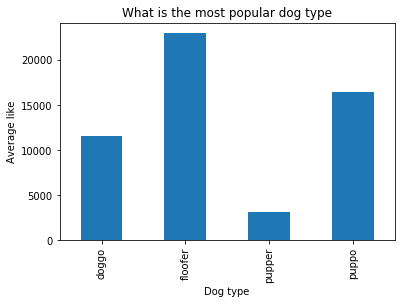

In [71]:
most_dog = twitter_archive_master.groupby('dog_type').favorites.median()

most_dog.plot(kind = 'bar');
plt.ylabel('Average like');
plt.xlabel('Dog type');
plt.title('What is the most popular dog type');

##### We can see both floofer is the popular in the account.
Note: I take the median to avoid the large number e.g. Bo. 

#### Question 3: What is the rating numerator average ? 

In [72]:
twitter_archive_master.rating_numerator.mean()

12.29197807673144

#### Question 4: What is the most source that the tweets comes from ? 

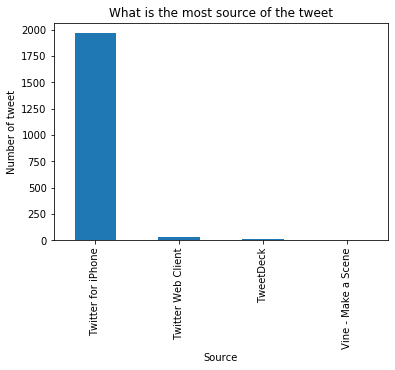

In [73]:
most_source = twitter_archive_master.source.value_counts()

most_source.plot(kind = 'bar');
plt.ylabel('Number of tweet');
plt.xlabel('Source');
plt.title('What is the most source of the tweet');

##### We can see a lot of people or most of the people tweeting from iPhone

### References 
- https://stackoverflow.com/questions/11331982/how-to-remove-any-url-within-a-string-in-python
- https://www.w3schools.com/python/python_lambda.asp
- https://www.geeksforgeeks.org/python-pandas-series-str-extract/https://www.geeksforgeeks.org/python-pandas-series-str-extract/